In [38]:
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
link = 'https://storage.yandexcloud.net/lms-itmo-ru-files-27a87tyf/Data_storage_and_processing/Ind_3_1/var732742.xlsx'
df = pd.read_excel(link)

Задание 1.1 Постройте столбчатую диаграмму по столбцу Choice_1 (столбец самого востребованного навыка).

In [ ]:
answers = df['Choice_1'].value_counts()
answers

,count
Choice_1,
Статистика,78
Визуализация данных,66
Big Data,56
Python,52
Методы искусственного интеллекта,50
Анализ текстов,46
Электронные таблицы,43
Обработка изображений,38
Машинное обучение,36


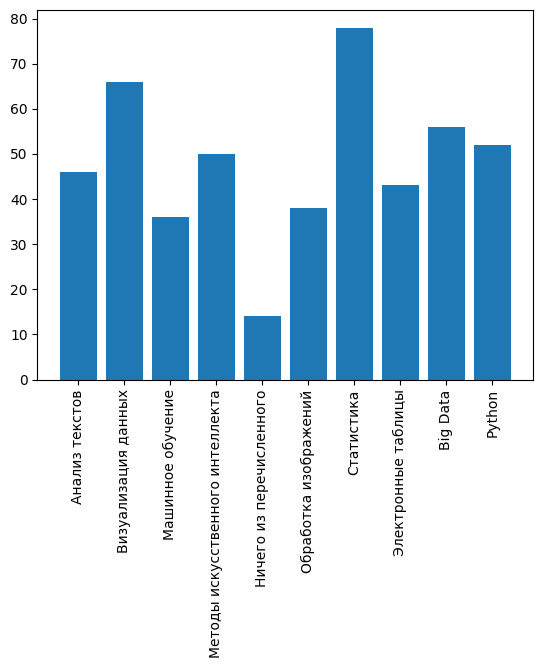

In [ ]:

answers = answers.sort_index()
answers = pd.concat([answers.iloc[2:], answers.iloc[:2]],  axis = 0)
answers.columns = ['Amount']
plt.bar(answers.index, answers.values)
plt.xticks(rotation = 'vertical')

plt.show()

Какое количество респондентов проголосовало за вариант Big Data?

In [ ]:
answers = df
answers.values.shape
answers.values.reshape(-1)
pd.DataFrame(answers.values.reshape(-1))


,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
5395,NaN
5396,NaN
5397,NaN
5398,NaN


In [ ]:
test = pd.DataFrame(answers.values.reshape(-1))[0].value_counts()
test = test.sort_index()
test

,count
0,
Big Data,217
Python,221
Анализ текстов,189
Визуализация данных,293
Машинное обучение,209
Методы искусственного интеллекта,219
Ничего из перечисленного,17
Обработка изображений,178
Статистика,268


строим круговую диаграмму

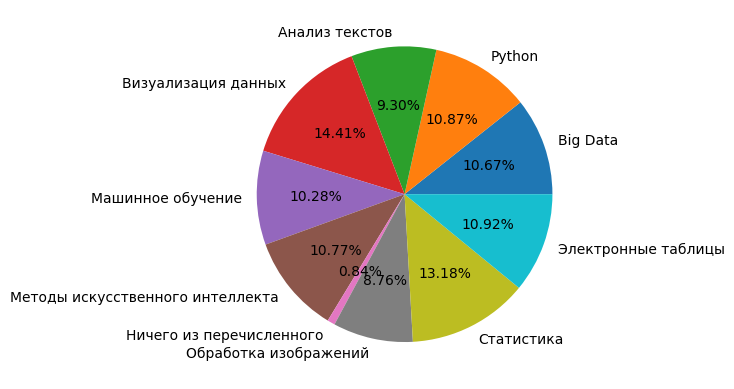

In [ ]:
plt.pie(test.values, labels=test.index , autopct= '%0.2f%%')
plt.show()


задача 3.1 диаграмма

candlestick chart with mplfinance as mpf

In [57]:
link = 'https://storage.yandexcloud.net/lms-itmo-ru-files-27a87tyf/Data_storage_and_processing/Ind_3_2/SPFB.RTS-12.18_180901_181231.csv'
df = pd.read_csv(link)
df['DATE'] = df['<DATE>'] + ' ' + df['<TIME>']
df['DATE'] = pd.to_datetime(df['DATE'], format = '%d/%m/%y %H:%M')
rows = df[df['DATE'].dt.strftime('%Y-%m-%d') == '2018-09-07']
rows

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,DATE
1062,SPFB.RTS-12.18,1,07/09/18,10:01,104750.0,104900.0,104750.0,104880.0,29,2018-09-07 10:01:00
1063,SPFB.RTS-12.18,1,07/09/18,10:02,104840.0,104940.0,104840.0,104940.0,12,2018-09-07 10:02:00
1064,SPFB.RTS-12.18,1,07/09/18,10:03,104950.0,105040.0,104950.0,104950.0,14,2018-09-07 10:03:00
1065,SPFB.RTS-12.18,1,07/09/18,10:04,104950.0,105000.0,104940.0,105000.0,11,2018-09-07 10:04:00
1066,SPFB.RTS-12.18,1,07/09/18,10:05,105000.0,105000.0,105000.0,105000.0,2,2018-09-07 10:05:00
...,...,...,...,...,...,...,...,...,...,...
1424,SPFB.RTS-12.18,1,07/09/18,23:37,103670.0,103670.0,103670.0,103670.0,1,2018-09-07 23:37:00
1425,SPFB.RTS-12.18,1,07/09/18,23:38,103650.0,103650.0,103650.0,103650.0,9,2018-09-07 23:38:00
1426,SPFB.RTS-12.18,1,07/09/18,23:45,103650.0,103650.0,103650.0,103650.0,4,2018-09-07 23:45:00
1427,SPFB.RTS-12.18,1,07/09/18,23:47,103700.0,103700.0,103700.0,103700.0,1,2018-09-07 23:47:00


для candlestick chart нужны колонки ['OPEN', 'HIGH', 'LOW', 'CLOSE'] from DateFraem
Эта функция выполняет ресемплирование (resampling) временного ряда test с агрегацией данных по часам ('1H'). Давай разберёмся подробнее, что происходит:

test.resample('1H') – группирует данные test по 1-часовым интервалам.

.agg({...}) – применяет агрегирующие функции к каждому столбцу:

'open': 'first' – берёт первое значение столбца open в каждом часовом интервале.

'high': 'max' – берёт максимальное значение столбца high за час.

'low': 'min' – берёт минимальное значение столбца low за час.

'close': 'last' – берёт последнее значение столбца close в этом интервале.

In [67]:
test = rows.set_index('DATE')
test = test[['<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>']]
test.columns = ['open', 'high', 'low', 'close']
d2 = test.resample('1H').agg({'open':'first',
                              'high':'max',
                              'low':'min',
                              'close':'last'

})
d2

<ipython-input-67-dd4007d0a04a>:4: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



,open,high,low,close
DATE,,,,
2018-09-07 10:00:00,104750.0,105200.0,104510.0,104750.0
2018-09-07 11:00:00,104700.0,104860.0,104320.0,104700.0
2018-09-07 12:00:00,104730.0,104880.0,104340.0,104450.0
2018-09-07 13:00:00,104400.0,104700.0,104240.0,104510.0
2018-09-07 14:00:00,104460.0,104530.0,104150.0,104150.0
2018-09-07 15:00:00,104140.0,104350.0,103790.0,103950.0
2018-09-07 16:00:00,103960.0,104250.0,103920.0,104180.0
2018-09-07 17:00:00,104240.0,104570.0,104240.0,104330.0
2018-09-07 18:00:00,104330.0,104560.0,104300.0,104560.0


In [65]:
import plotly.graph_objects as go

для построения графика Candlestick необходимо задать следующие параметры:
1) значения на оси Х
2) данные open, high, low, close за определнный период

In [69]:
fig = go.Figure(data = [go.Candlestick(x = d2.index,
                open = d2['open'],
                high = d2['high'],
                low = d2['low'],
                close = d2['close'])])
fig.show()